In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [2]:
encoded_data =pd.read_csv('C:/Users/A4647/OneDrive - Axtria/Desktop/Datadrift/Datadrift_POC_with_health_data/artifact/data/meta_data(data_cleaned).csv',)

In [3]:
encoded_data

,Gender,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication,Test Results,Age_group,days in Hospital,bill_group
0,0,0,0,0,0,0,0,0,14,0
1,1,1,1,1,1,1,1,1,14,0
2,1,2,2,0,1,1,1,0,30,0
3,1,2,1,0,2,2,2,0,1,1
4,1,0,3,1,2,3,1,0,24,1
...,...,...,...,...,...,...,...,...,...,...
9995,1,4,2,1,0,4,2,0,4,0
9996,0,3,3,4,1,4,1,0,23,2
9997,1,2,3,4,0,4,1,0,14,0
9998,1,4,3,1,2,2,1,0,20,1


In [4]:
x = encoded_data.drop('Test Results',1)
y = encoded_data['Test Results']

In [5]:
num = ['days in Hospital']

In [6]:
ss = StandardScaler()

In [7]:
x[num] = ss.fit_transform(x[num])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [9]:
xg = xgb.XGBClassifier()

In [10]:
xg_model = xg.fit(x_train, y_train)

In [35]:
y_test_pred = xg_model.predict(x_test)
y_train_pred = xg_model.predict(x_train)
y_test_prob_1 = xg_model.predict_proba(x_test)[:,1]

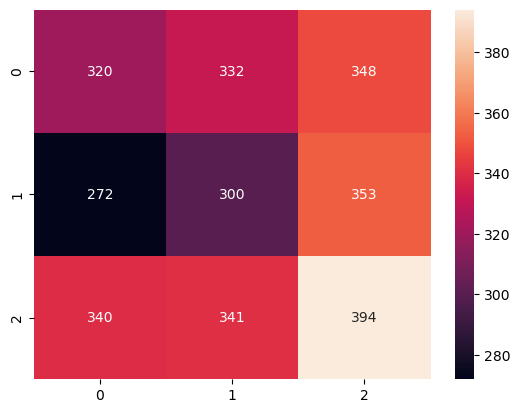

In [36]:
cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt='.0f');

In [37]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.34      0.32      0.33      1000
           1       0.31      0.32      0.32       925
           2       0.36      0.37      0.36      1075

    accuracy                           0.34      3000
   macro avg       0.34      0.34      0.34      3000
weighted avg       0.34      0.34      0.34      3000



In [38]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2277
           1       0.88      0.87      0.88      2342
           2       0.87      0.88      0.88      2381

    accuracy                           0.87      7000
   macro avg       0.87      0.87      0.87      7000
weighted avg       0.87      0.87      0.87      7000



In [39]:
xg_accuracy_score = accuracy_score(y_train,y_train_pred)
print("Train accuracy = ",xg_accuracy_score)

Train accuracy =  0.8731428571428571


In [40]:
k = KFold(n_splits = 5, shuffle = True, random_state = 48)
scores = cross_val_score(xg,x,y,cv=k,scoring = 'f1_weighted')
dt_bias = 1-np.mean(scores)
dt_var = np.std(scores)/np.mean(scores)
print('Scores:',scores)
print('Bias error:',1-np.mean(scores))
print('Variance error:', np.std(scores)/np.mean(scores))

Scores: [0.32197624 0.33358382 0.3638901  0.32921702 0.35055266]
Bias error: 0.660156033609921
Variance error: 0.044901644281190575
